# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.

They have planned to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to <b>understand the factors affecting the demand for these shared bikes in the American market.</b> The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 30)

## 1. Read & Inspect the data

In [1]:
df = pd.read_csv("day.csv")

NameError: name 'pd' is not defined

In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### No Null values observed in any columns

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Parse the date column as datetime type. This is currently of Object type

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Convert the categorical variables as per the data dictionary

Map the season values as per the data dictionary
    - 1:spring
    - 2:summer
    - 3:fall
    - 4:winter

Map the weathersit values as per the data dictionary
- 1: <b>Clear</b>, Few clouds, Partly cloudy, Partly cloudy
- 2: <b>Mist</b> + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: <b>Light Snow</b>, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: <b>Heavy Rain</b> + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
df.season = df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [13]:
df.weathersit = df.weathersit.map({1:'clear',2:'mist',3:'lightrain',4:'heavyrain'})

In [14]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
df.weathersit.value_counts()

clear        463
mist         246
lightrain     21
Name: weathersit, dtype: int64

In [16]:
df.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

## 2. Data Analysis
### Univariate analysis of binary and numeric variables

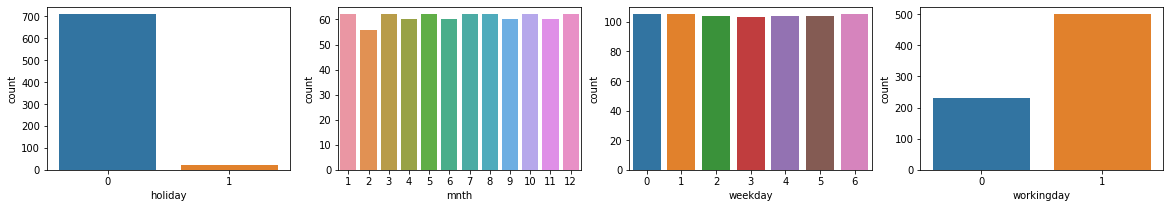

In [17]:
plt.figure(figsize=(20,3))
plt.subplot(141)
sns.countplot(df.holiday)
plt.subplot(142)
sns.countplot(df.mnth)
plt.subplot(143)
sns.countplot(df.weekday)
plt.subplot(144)
sns.countplot(df.workingday)
plt.show()

### Univariate analysis of continuous variables

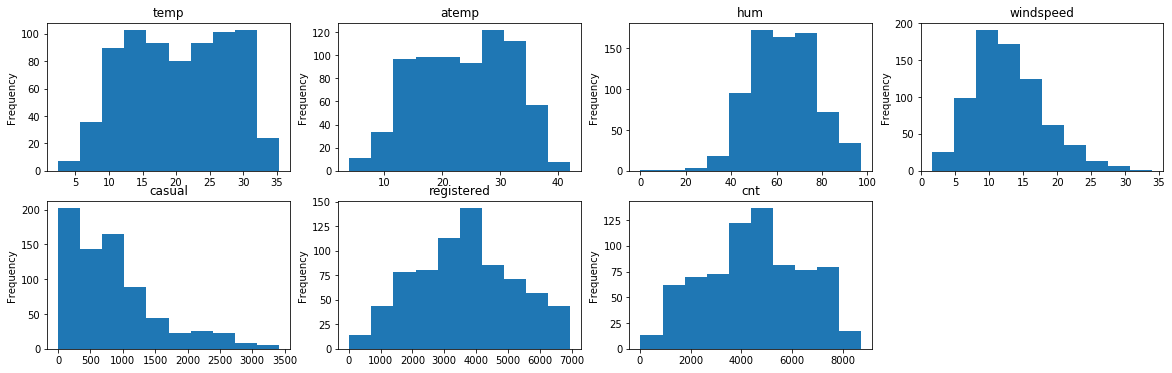

In [18]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']
plt.figure(figsize=(20,6))
for i in range(len(cont_vars)):
    plt.subplot(2,4,i+1)
    plt.title(cont_vars[i])
    df[cont_vars[i]].plot.hist()
plt.show()

### Bivariate analysis of categorical variables against target variable 'cnt'

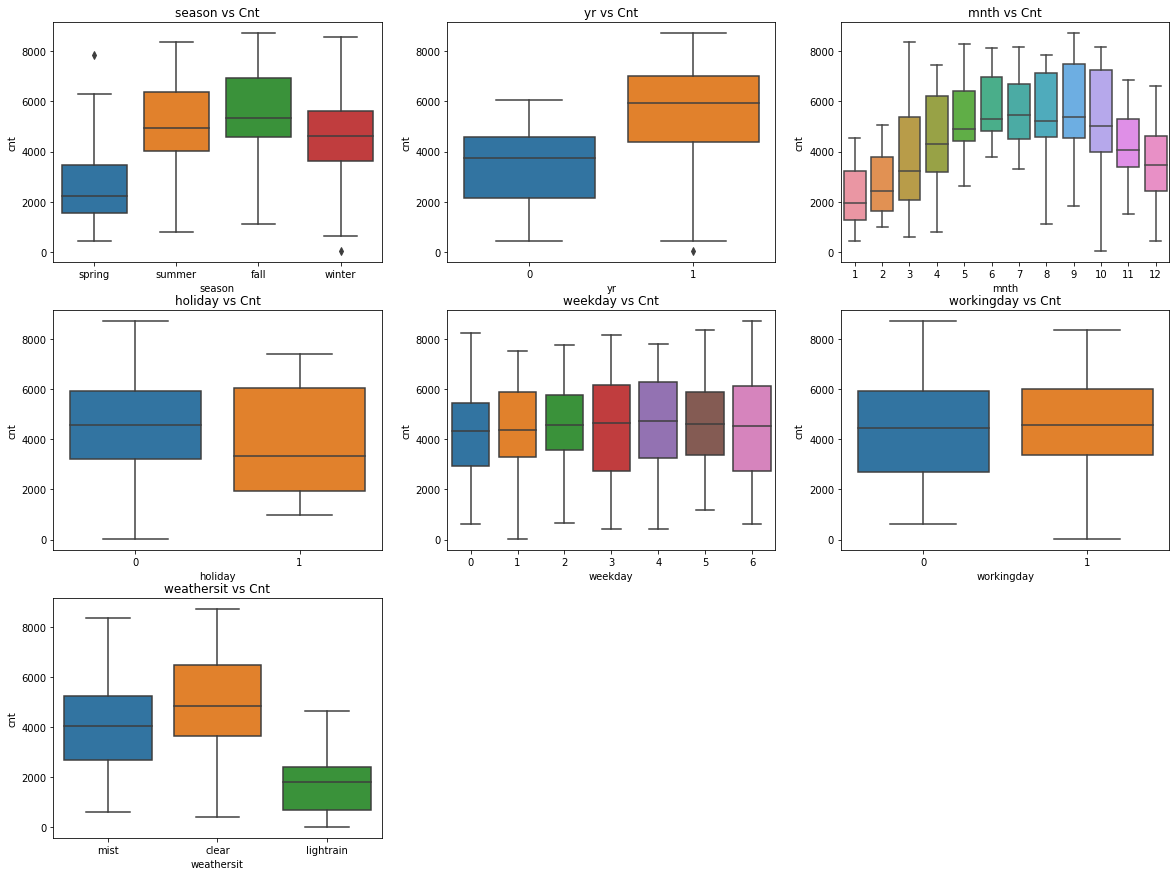

In [19]:
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
plt.figure(figsize=(20,15))
for i in range(len(cat_vars)):
    plt.subplot(3,3,i+1)
    plt.title(cat_vars[i]+' vs Cnt')
    sns.boxplot(x=cat_vars[i],y='cnt',data=df)
plt.show()

### Bivariate analysis of continuous variables against target variables 'cnt'

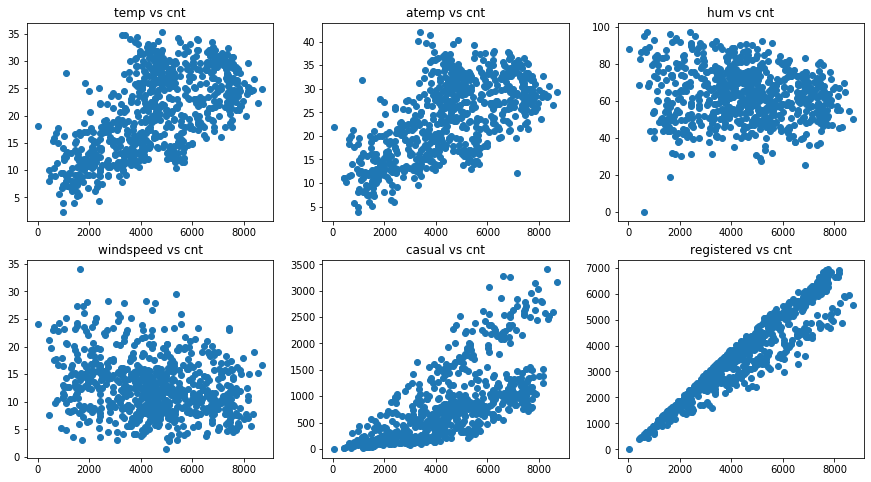

In [20]:
plt.figure(figsize=(15,8))
for i in range(len(cont_vars)-1):
    plt.subplot(2,3,i+1)
    plt.title(cont_vars[i]+' vs cnt')
    plt.scatter(df['cnt'], df[cont_vars[i]])
plt.show()

### From the above EDA, following observations are made
    1. temp and atemp are highly correlated with the target variable 'cnt'
    2. casual and registered variables which directly proportional to the targt variable 'cnt' has to be dropped as this will influence the model prediction.
    3. The season 'fall' has high number of 'cnt' followed by summer, winter and finally spring with low no. of 'cnt'
    4. The month wise boxplot against target 'cnt' showcases that during the middle of the year the 'cnt' has picked up. 
    5. Especially the months from 6 to 10 has significant improvement compared to other months.
    6. Day of the week doesn't has any impact as all the days has uniform distributions against target 'cnt'  variable.

In [21]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [22]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## 3. Data Preparation
### Create dummy variables for all the categorical variables

In [23]:
season = pd.get_dummies(df['season'], drop_first=True)

In [24]:
df_lr = pd.concat([df, season], axis = 1)
df_lr.drop('season',axis=1,inplace=True)

In [25]:
df.weathersit.value_counts()

clear        463
mist         246
lightrain     21
Name: weathersit, dtype: int64

In [26]:
weathersit = pd.get_dummies(df['weathersit'], drop_first=True)

In [27]:
df_lr = pd.concat([df_lr, weathersit], axis = 1)
df_lr.drop('weathersit',axis=1,inplace=True)

In [28]:
month = pd.get_dummies(df['mnth'], drop_first=True)

In [29]:
df_lr = pd.concat([df_lr, month], axis = 1)
df_lr.drop('mnth',axis=1,inplace=True)

In [30]:
df_lr.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightrain,mist,2,3,4,5,6,7,8,9,10,11,12
0,1,2018-01-01,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,2018-02-01,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,2018-03-01,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2018-05-01,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Rename the dummy columns retrieved from month categorical variable with appropriate names

In [31]:
df_lr.rename(columns={2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [32]:
weekday = pd.get_dummies(df['weekday'],drop_first=True)

In [33]:
df_lr = pd.concat([df_lr, weekday], axis = 1)
df_lr.drop('weekday',axis=1,inplace=True)

In [34]:
df_lr.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightrain,mist,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,1,2,3,4,5,6
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
df_lr.rename(columns={1:'Mon',2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'}, inplace=True)

In [36]:
df_lr.drop('instant',axis=1,inplace=True)
df_lr.drop('dteday',axis=1,inplace=True)

In [37]:
df_lr.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightrain,mist,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Correlation of variables against the target variable 'cnt'

In [38]:
df_lr.corr()['cnt'].abs().sort_values(ascending=False)

cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
spring        0.561702
Feb           0.273848
lightrain     0.240602
windspeed     0.235132
Jun           0.195568
Sep           0.194664
Aug           0.182100
Dec           0.173878
mist          0.170686
Jul           0.166236
summer        0.145325
May           0.132553
Mar           0.128456
Oct           0.108846
hum           0.098543
holiday       0.068764
winter        0.064619
workingday    0.062542
Nov           0.040344
Fri           0.038403
Mon           0.035991
Thurs         0.033551
Wed           0.014012
Sat           0.009012
Apr           0.003574
Tue           0.000560
Name: cnt, dtype: float64

In [39]:
df_lr.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightrain,mist,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.028767,0.336986,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.167266,0.473004,0.266317,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plot the heatmap with the correlation to observe the strong dependencies

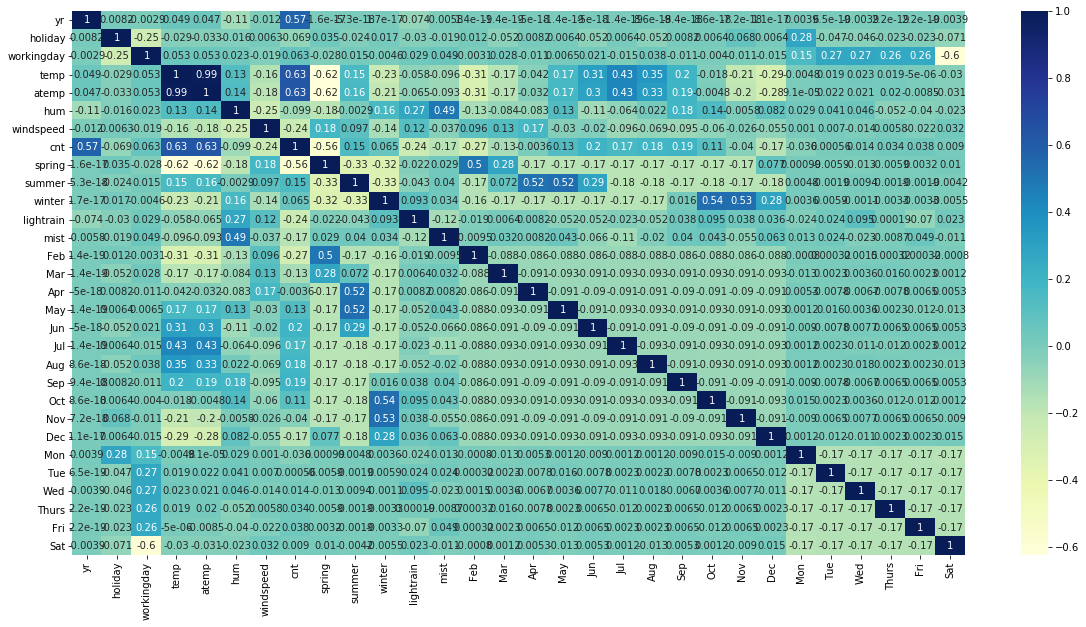

In [40]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_lr.corr(), annot = True, cmap="YlGnBu")
plt.show()

### As it is evident that the days of the week are less correlated againt target variable. Plot the correlation without them for better understanding.

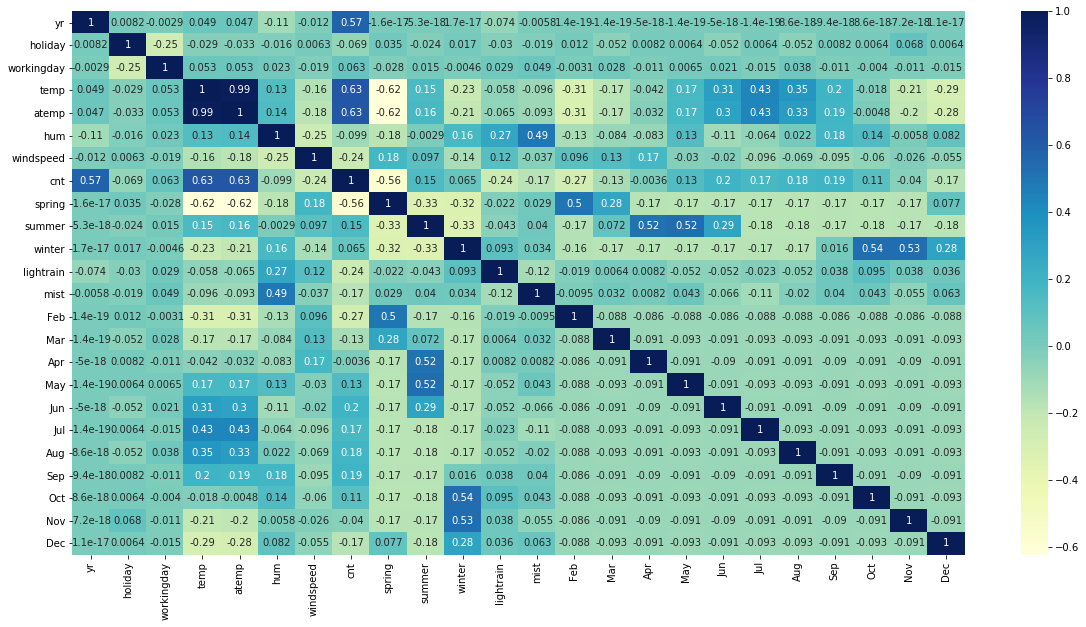

In [41]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_lr[df_lr.columns[:24]].corr(), annot = True, cmap="YlGnBu")
plt.show()

### For more detailed correlation identification, plot the pairplot for all the variables.

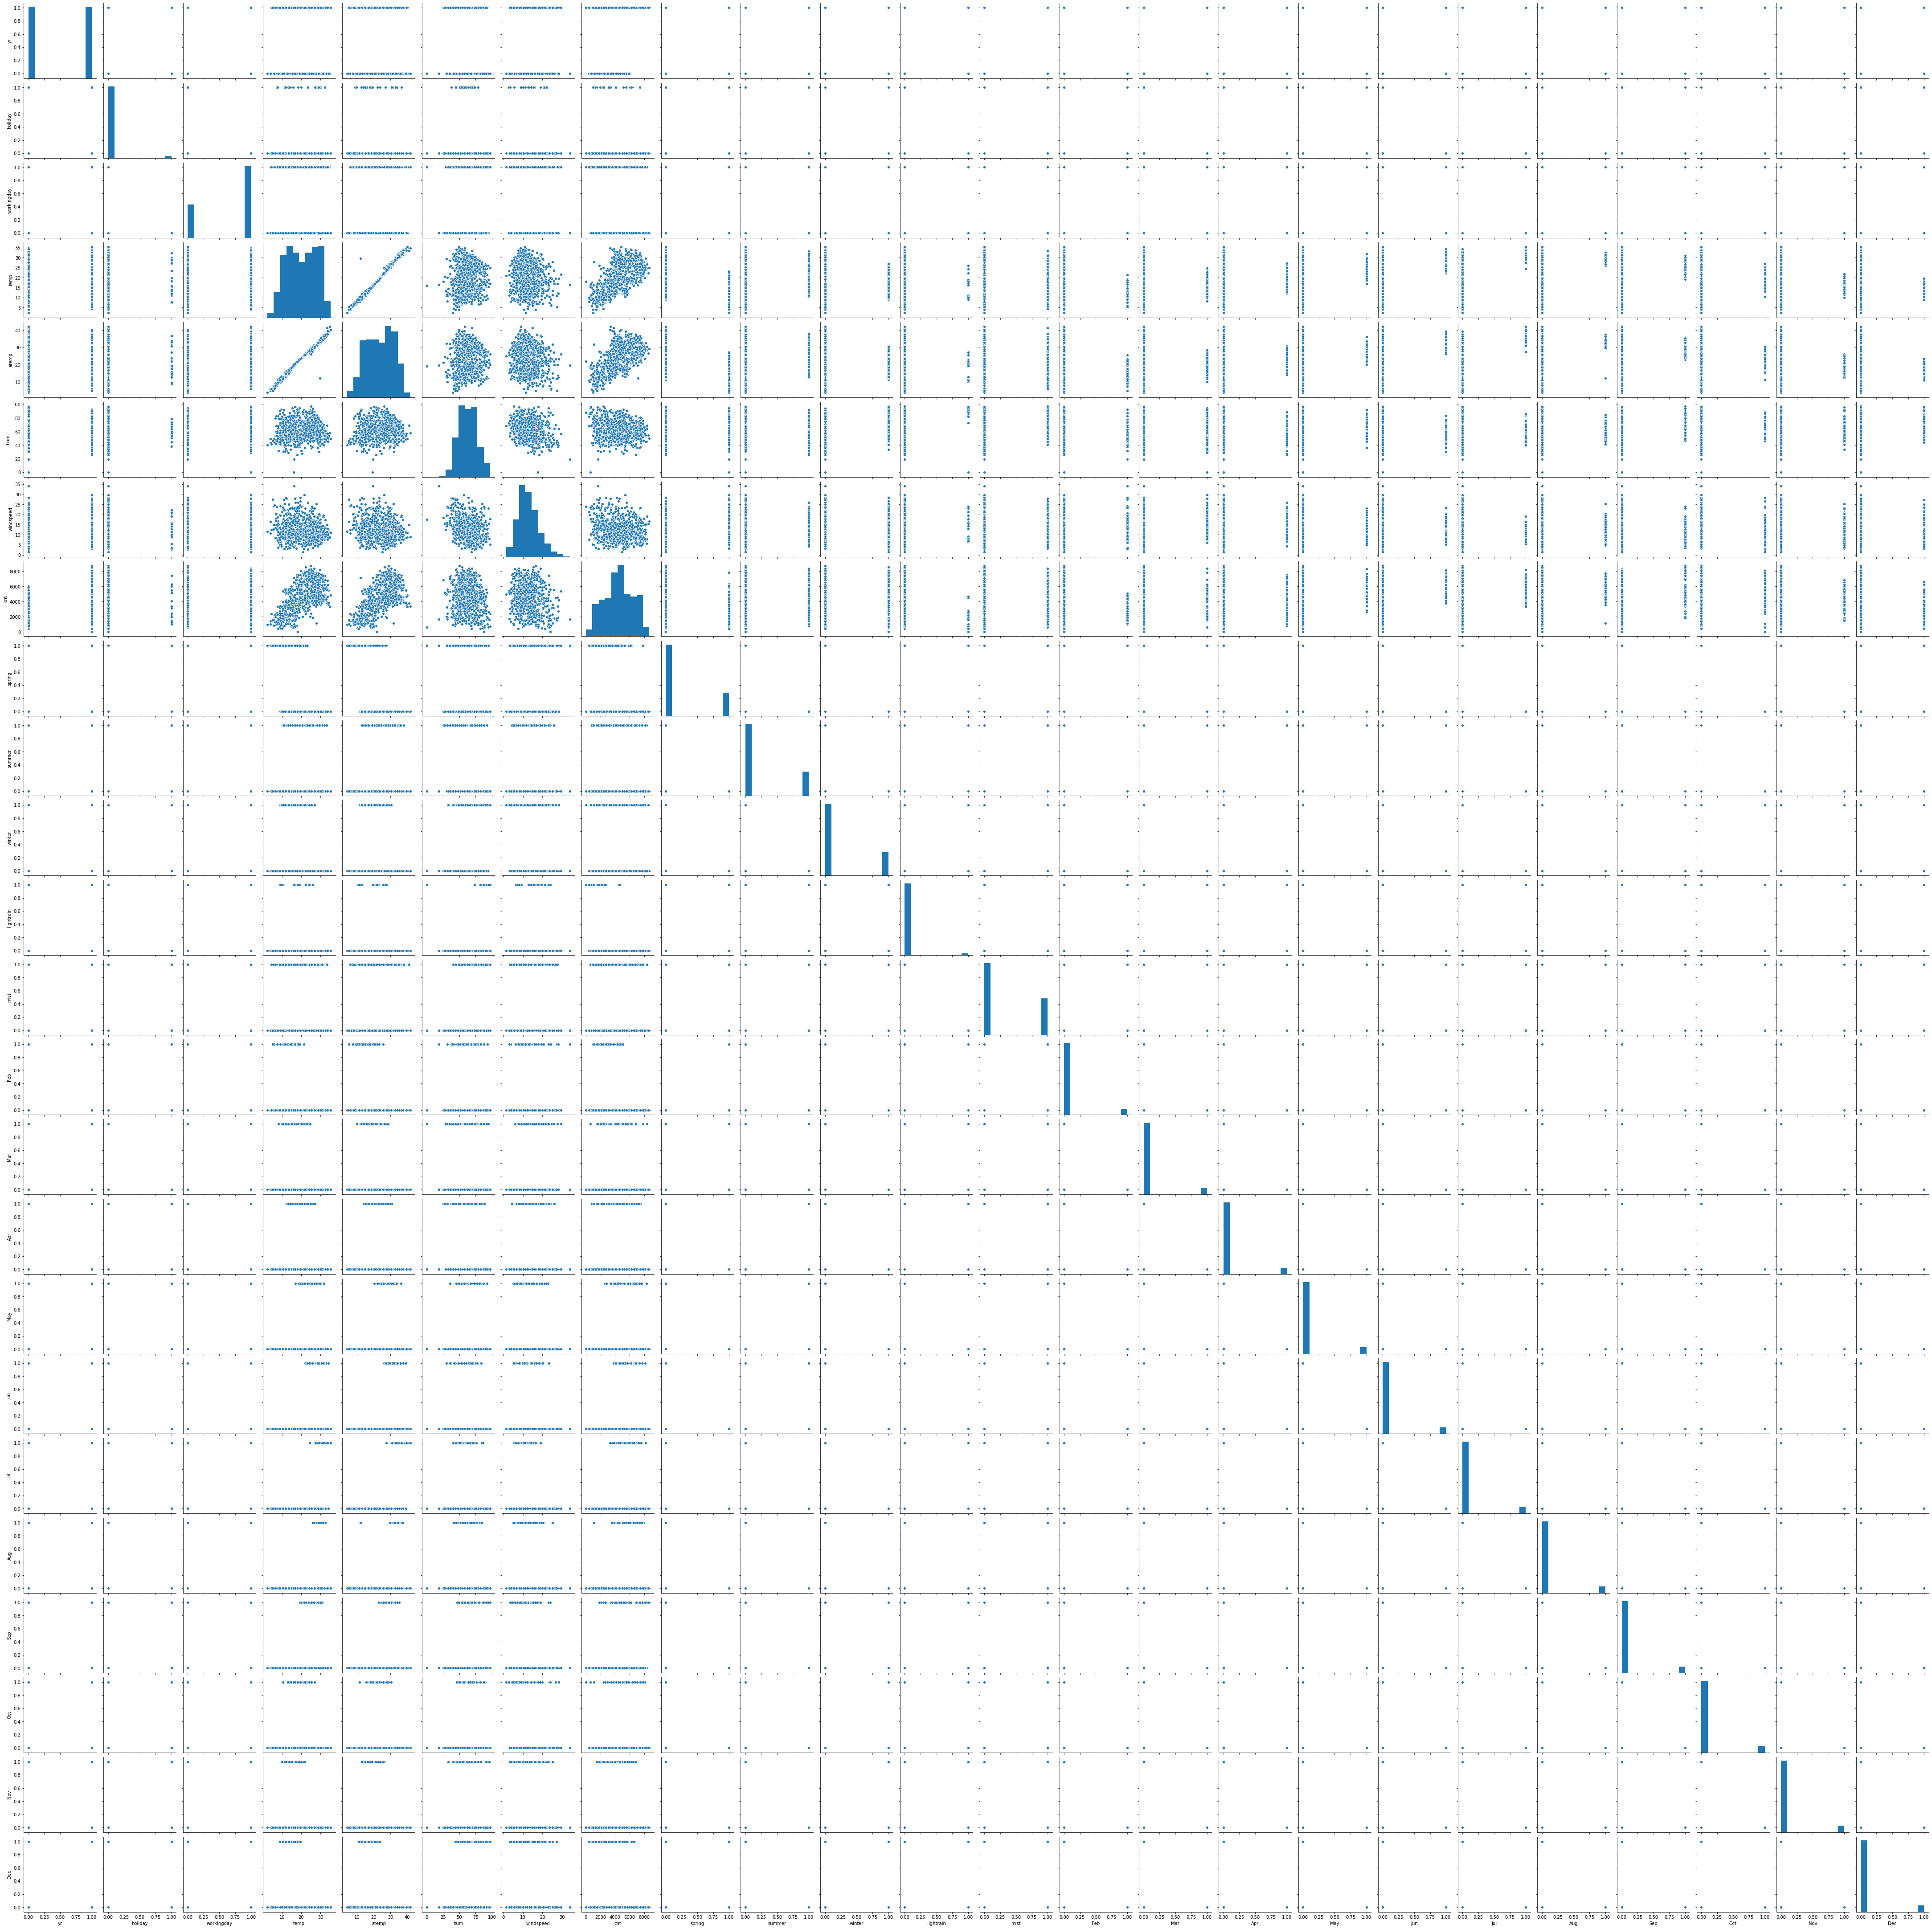

In [42]:
sns.pairplot(df_lr[df_lr.columns[:24]])
plt.show()

#### The observations made above after the data analysis holds good even after the correlation & pairplots
    - The temp and atemp variables have strong impact on the target variable 'cnt'
    - However, as the teamp and atemp themselves have correlation, we may have one of these variables in the model.

## 4. Modeling

In [43]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Identify the continuous variables that needed to be scaled. Binary variables are not required to be scaled.

In [44]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']

### Perform the train test split for the model

In [45]:
np.random.seed(0)
df_train, df_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Perform the scaling after the train test split. 
Both fit and transform are done on train dataset, but only transform will be done on test dataset with the same instance of scaler.

In [47]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightrain,mist,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Creates the y_train with the target variable 'cnt' and X_train with rest of the variables

In [49]:
y_train = df_train.pop('cnt')
X_train = df_train

## 4.1 Modeling Approach
#### We will take a mixed modeling approach where we will identify a subset of important variables with RFE first and then manually we will finetune the model for a best fitted line
    1. RFE (Recursive Feature Selection): Using the RFE feature_selection technique of sklearn package, first identify the top 15 variables that highly supports the best fitted line.
    2. With the output of 15 variables from RFE, we will manully observe the isignificant or collinear variables by building models one by one until we arrive at a satisfactory model.

### 4.1.1 RFE

In [50]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('lightrain', True, 1),
 ('mist', True, 1),
 ('Feb', False, 7),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', True, 1),
 ('Jul', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', False, 2),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Mon', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 14),
 ('Thurs', False, 15),
 ('Fri', False, 13),
 ('Sat', False, 3)]

#### Variables that are least significant after the RFE. We will further manually finetune the module with the available 15 variables.

In [52]:
X_train[X_train.columns[~rfe.support_]]

,workingday,atemp,summer,Feb,Jul,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat
653,1,0.501133,0,0,0,1,0,0,0,1,0,0,0,0
576,1,0.766351,0,0,1,0,0,0,0,1,0,0,0,0
426,0,0.438975,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0.200348,0,0,0,0,0,1,0,0,0,0,0,0
482,0,0.391735,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.762183,1,0,0,0,0,0,1,0,0,0,0,0
578,1,0.824359,0,0,0,0,0,0,0,0,0,1,0,0
53,1,0.218747,0,1,0,0,0,0,0,0,1,0,0,0
350,0,0.223544,0,0,0,0,0,1,0,0,0,0,0,1


### 4.1.1 Manual Finetuning of model
    - We take a backward approach where we begin with RFE supported 15 variables.
    - In the backward approach we drop variables one by one until we arrive at a satisfactory model.
#### Define methods to build model and checking VIF as these two actions needed to be carried frequently

In [53]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() #fitting the model
    print(lm.summary()) #model summary
    return lm  #retrun the model
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [54]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'lightrain', 'mist', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue',
       'Wed', 'Thurs', 'Fri', 'Sat'],
      dtype='object')

### MODEL 1

In [55]:
X_train_md1 = X_train[X_train.columns[rfe.support_]]

In [56]:
X_train_md1.head()

,yr,holiday,temp,hum,windspeed,spring,winter,lightrain,mist,Mar,Apr,May,Jun,Aug,Sep
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [57]:
lr1 = build_model(X_train_md1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.99e-188
Time:                        21:27:31   Log-Likelihood:                 511.20
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2867      0.034      8.537      0.0

In [58]:
checkVIF(X_train_md1)

,Features,VIF
3,hum,25.74
2,temp,16.09
4,windspeed,4.69
5,spring,3.62
6,winter,3.29
8,mist,2.26
0,yr,2.09
13,Aug,1.93
11,May,1.77
10,Apr,1.69


### MODEL 2

As the variable **hum** is found to be with high VIF value *(highly collinear with other independent variables)*. Drop the variable and proceed.

In [59]:
X_train_md2 = X_train_md1.drop('hum',axis=1)

In [60]:
lr2 = build_model(X_train_md2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.23e-185
Time:                        21:27:31   Log-Likelihood:                 502.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2030      0.027      7.445      0.0

In [61]:
checkVIF(X_train_md2)

,Features,VIF
2,temp,6.49
3,windspeed,4.68
4,spring,2.10
0,yr,2.08
5,winter,1.94
12,Aug,1.91
11,Jun,1.65
10,May,1.59
7,mist,1.55
9,Apr,1.53


### MODEL 3

Drop the variable **Aug** as both the p-value and VIF is comparatively large. Lets not drop **temp** variable as it found to be very significant.

In [62]:
X_train_md3 = X_train_md2.drop('Aug',axis=1)

In [63]:
lr3 = build_model(X_train_md3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.73e-185
Time:                        21:27:32   Log-Likelihood:                 498.70
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     496   BIC:                            -910.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2144      0.027      7.908      0.0

In [64]:
checkVIF(X_train_md3)

,Features,VIF
3,windspeed,4.67
2,temp,4.46
0,yr,2.08
4,spring,1.99
5,winter,1.63
7,mist,1.54
9,Apr,1.38
11,Jun,1.35
10,May,1.32
8,Mar,1.29


### MODEL 4

Drop the variable **Jun** as this is the only variable with slight above p-value

In [65]:
X_train_md4 = X_train_md3.drop('Jun',axis=1)

In [66]:
lr4 = build_model(X_train_md4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.89e-185
Time:                        21:27:32   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2218      0.027      8.224      0.0

In [67]:
checkVIF(X_train_md4)

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,yr,2.08
4,spring,1.95
5,winter,1.55
7,mist,1.53
9,Apr,1.33
8,Mar,1.28
10,May,1.25
11,Sep,1.20


### MODEL 5

Drop the variable **Apr** as this is the variable with slight above p-value

In [68]:
X_train_md5 = X_train_md4.drop('Apr',axis=1)

In [69]:
lr5 = build_model(X_train_md5, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.89e-185
Time:                        21:27:32   Log-Likelihood:                 493.71
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     498   BIC:                            -912.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2502      0.024     10.332      0.0

In [70]:
checkVIF(X_train_md5)

,Features,VIF
3,windspeed,4.01
2,temp,3.90
0,yr,2.05
4,spring,1.78
7,mist,1.52
5,winter,1.43
8,Mar,1.26
9,May,1.21
10,Sep,1.19
6,lightrain,1.08


### MODEL 6

Drop the variable **May** as this is the variable with slight above p-value

In [71]:
X_train_md6 = X_train_md5.drop('May',axis=1)

In [72]:
lr6 = build_model(X_train_md6, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.36e-184
Time:                        21:27:33   Log-Likelihood:                 489.81
No. Observations:                 510   AIC:                            -957.6
Df Residuals:                     499   BIC:                            -911.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2632      0.024     11.006      0.0

In [73]:
checkVIF(X_train_md6)

,Features,VIF
3,windspeed,3.99
2,temp,3.75
0,yr,2.05
4,spring,1.75
7,mist,1.50
5,winter,1.38
8,Mar,1.25
9,Sep,1.16
6,lightrain,1.08
1,holiday,1.05


## The MODEL 6 is satisfactory 
    - p-values for all the variables are almost negligible and 
    - the VIFs are also under 4.

### Final R_Square and Adjusted R_Square values

In [74]:
print(round(lr6.rsquared,3))
print(round(lr6.rsquared_adj,3))

0.83
0.826


## 5. Verifying the assumptions of Linear Regression
1. It was already explained that there are linear relationship between the target variable and the independent variables.

The below assumptions will be explored further:
2. The error terms has to be normally distributed.
3. The error terms are independent of each other and do not follow any pattern.
4. The error terms are constant variance, homoscedastic.

In [75]:
y_train_pred = lr6.predict(sm.add_constant(X_train_md6))

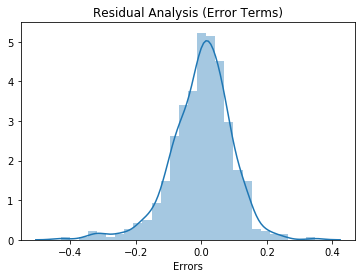

In [76]:
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Errors')
plt.title('Residual Analysis (Error Terms)')
plt.show()

### With the above density plot of residuals, it is evident that the error terms are normally distributed.

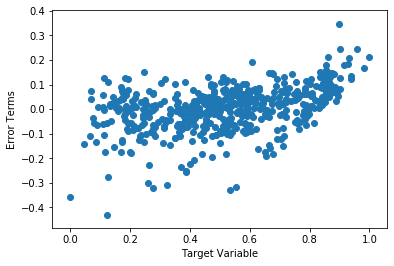

In [77]:
plt.scatter(y_train, res)
plt.xlabel('Target Variable')
plt.ylabel('Error Terms')
plt.show()

### With the above scatter plot of error terms, it is evident that they are not following any pattern and are independent to each other.

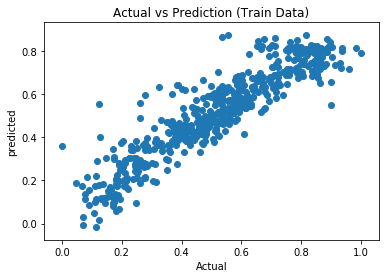

In [78]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs Prediction (Train Data)')
plt.show()

### With the above scatter plot of actual vs predicted values, it is evident that the model is doing pretty much good and it is also observed that it is homoscedastic.

## 6. Model Evaluation
1. Predict the target variable on test dataset
2. Observe the R2 and Adjusted R2 values. Make sure it doesn't drop significantly.
3. Validate the assumption of linear regression

#### Perform scaling on the test dataset for the same varibales and with the same scaler as in train dataset

In [79]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test[X_train_md6.columns]

In [81]:
X_test_md = sm.add_constant(X_test)

#### Predict the target variable on the test dataset with the same final model and observe the error terms

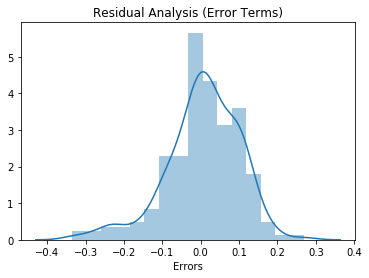

In [82]:
y_test_pred = lr6.predict(X_test_md)

res_test = y_test - y_test_pred
sns.distplot(res_test)
plt.xlabel('Errors')
plt.title('Residual Analysis (Error Terms)')
plt.show()

#### Error terms are normally distributed as in train dataset

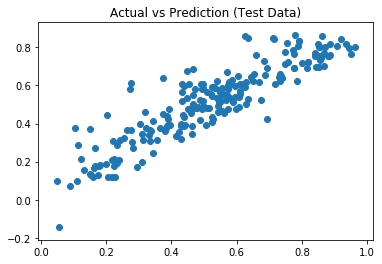

In [83]:
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Prediction (Test Data)')
plt.show()

#### The accuracy of predicted vs actual is good and the variance is homoscedastic.

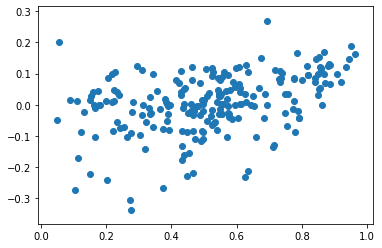

In [84]:
plt.scatter(y_test, res_test)
plt.show()

#### The error terms do not carry any pattern and are independent of each other as in train dataset.

### Identify & compare the R2 and Adjusted R2 values

In [85]:
r_squared = r2_score(y_test, y_test_pred)
print('R Square on test dataset: ',round(r_squared,3))

adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_md.shape[1]-1)
print('Adjusted R square on test dataset: ', round(adj_r_squared,3))

R Square on test dataset:  0.807
Adjusted R square on test dataset:  0.797


In [86]:
print('R Square on train dataset:',round(lr6.rsquared,3))
print('Adjusted R square on train dataset:',round(lr6.rsquared_adj,3))

R Square on train dataset: 0.83
Adjusted R square on train dataset: 0.826


### We conclude the model is a good fit meeting all the assumptions and performing well on test dataset as well
1. The R_Square and Adjusted R_Square values are close between train and test datasets
2. The assumptions of linear regression holds good and observed similar in both the train and test datasets.

Manual computation of Adjusted R_Square value for train dataset which comes very same as the one displayed on model summary.

In [87]:
adj_rs_train = 1 - (1-lr6.rsquared)*(len(y_train)-1)/(len(y_train)-X_train_md6.shape[1]-1)
print(adj_rs_train)

0.8262163284230278


## 7. Final Model
Below is the list of independent variables along with it's weight of impact on the target variable.
1. The variables **temp, year, sep, winter, mar** has positive correlation on the target being **temp** having high impact.
2. The variables *lightrain, windspeed, spring, holiday, mist* has negative correlation on the target being *lightrain* with high impact.

In [88]:
lr6.params.sort_values(ascending=False)

temp         0.411484
const        0.263162
yr           0.235161
Sep          0.071822
winter       0.051705
Mar          0.040658
mist        -0.078555
holiday     -0.092386
spring      -0.121956
windspeed   -0.140771
lightrain   -0.291059
dtype: float64

### The equation of the best fitted line is:

$ count = 0.26 + 0.41  \times  temp - 0.29  \times  lightrain + 0.24 \times year - 0.14 \times windspeed - 0.12 \times spring - 0.09 \times holiday - 0.08 \times mist + 0.07 \times september + 0.05 \times winter + 0.04 \times march $


1. temp.........0.4115	<br>
2. lightrain....0.2911	(negative) <br>
3. const........0.2632	<br>
4. yr.............0.2352  <br>
5. windspeed..0.1408	(negative) <br>
6. spring........0.122	(negative) <br>
7. holiday......0.0924	(negative) <br>
8. mist...........0.0786	(negative) <br>
9. Sep..........0.0718	<br>
10. winter........0.0517	<br>
11. Mar...........0.0407	